In [4]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder \
        .master('local') \
        .appName('Neural Network Model') \
        .config ('spark.executor.memory', '6gb') \
        .getOrCreate()

sc = spark.sparkContext

In [7]:
df = spark.createDataFrame ([('Male', 67, 150), # insert column values
                            ('Female', 65, 135),
                            ('Female', 68, 130),
                            ('Male', 70, 160),
                            ('Female', 70, 130),
                            ('Male', 69, 174),
                            ('Female', 65, 126),
                            ('Male', 74, 188),
                            ('Female', 60, 110),
                            ('Female', 63, 125),
                            ('Male', 70, 173),
                            ('Male', 70, 145),
                            ('Male', 68, 175),
                            ('Female', 65, 123),
                            ('Male', 71, 145),
                            ('Male', 74, 160),
                            ('Female', 64, 135),
                            ('Male', 71, 175),
                            ('Male', 67, 145),
                            ('Female', 67, 130),
                            ('Male', 70, 162),
                            ('Female', 64, 107),
                            ('Male', 70, 175),
                            ('Female', 64, 130),
                            ('Male', 66, 163),
                            ('Female', 63, 137),
                            ('Male', 65, 165),
                            ('Female', 65, 130),
                            ('Female', 64, 109)],
                           ['gender', 'height', 'weight']) # insert header values

In [8]:
df.show ()

+------+------+------+
|gender|height|weight|
+------+------+------+
|  Male|    67|   150|
|Female|    65|   135|
|Female|    68|   130|
|  Male|    70|   160|
|Female|    70|   130|
|  Male|    69|   174|
|Female|    65|   126|
|  Male|    74|   188|
|Female|    60|   110|
|Female|    63|   125|
|  Male|    70|   173|
|  Male|    70|   145|
|  Male|    68|   175|
|Female|    65|   123|
|  Male|    71|   145|
|  Male|    74|   160|
|Female|    64|   135|
|  Male|    71|   175|
|  Male|    67|   145|
|Female|    67|   130|
+------+------+------+
only showing top 20 rows



In [9]:
from pyspark.sql import functions

In [10]:
df = df.withColumn ('gender', functions.when (df ['gender'] == 'Female', 0).otherwise (1))
df = df.select ('height', 'weight', 'gender')

In [11]:
df.show ()

+------+------+------+
|height|weight|gender|
+------+------+------+
|    67|   150|     1|
|    65|   135|     0|
|    68|   130|     0|
|    70|   160|     1|
|    70|   130|     0|
|    69|   174|     1|
|    65|   126|     0|
|    74|   188|     1|
|    60|   110|     0|
|    63|   125|     0|
|    70|   173|     1|
|    70|   145|     1|
|    68|   175|     1|
|    65|   123|     0|
|    71|   145|     1|
|    74|   160|     1|
|    64|   135|     0|
|    71|   175|     1|
|    67|   145|     1|
|    67|   130|     0|
+------+------+------+
only showing top 20 rows



In [13]:
import numpy as np

data_array = np.array (df.select ('height', 'weight', 'gender').collect ())

In [15]:
data_array # View the array

array([[ 67, 150,   1],
       [ 65, 135,   0],
       [ 68, 130,   0],
       [ 70, 160,   1],
       [ 70, 130,   0],
       [ 69, 174,   1],
       [ 65, 126,   0],
       [ 74, 188,   1],
       [ 60, 110,   0],
       [ 63, 125,   0],
       [ 70, 173,   1],
       [ 70, 145,   1],
       [ 68, 175,   1],
       [ 65, 123,   0],
       [ 71, 145,   1],
       [ 74, 160,   1],
       [ 64, 135,   0],
       [ 71, 175,   1],
       [ 67, 145,   1],
       [ 67, 130,   0],
       [ 70, 162,   1],
       [ 64, 107,   0],
       [ 70, 175,   1],
       [ 64, 130,   0],
       [ 66, 163,   1],
       [ 63, 137,   0],
       [ 65, 165,   1],
       [ 65, 130,   0],
       [ 64, 109,   0]])

In [16]:
data_array.shape

(29, 3)

In [17]:
data_array [0]

array([ 67, 150,   1])

In [18]:
data_array [28]

array([ 64, 109,   0])

In [19]:
print (data_array.max (axis = 0))
print (data_array.min (axis = 0))

[ 74 188   1]
[ 60 107   0]


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
min_x = data_array.min (axis = 0) [0] -10
max_x = data_array.max (axis = 0) [0] +10
min_y = data_array.min (axis = 0) [1] -10
max_y = data_array.max (axis = 0) [1] +10

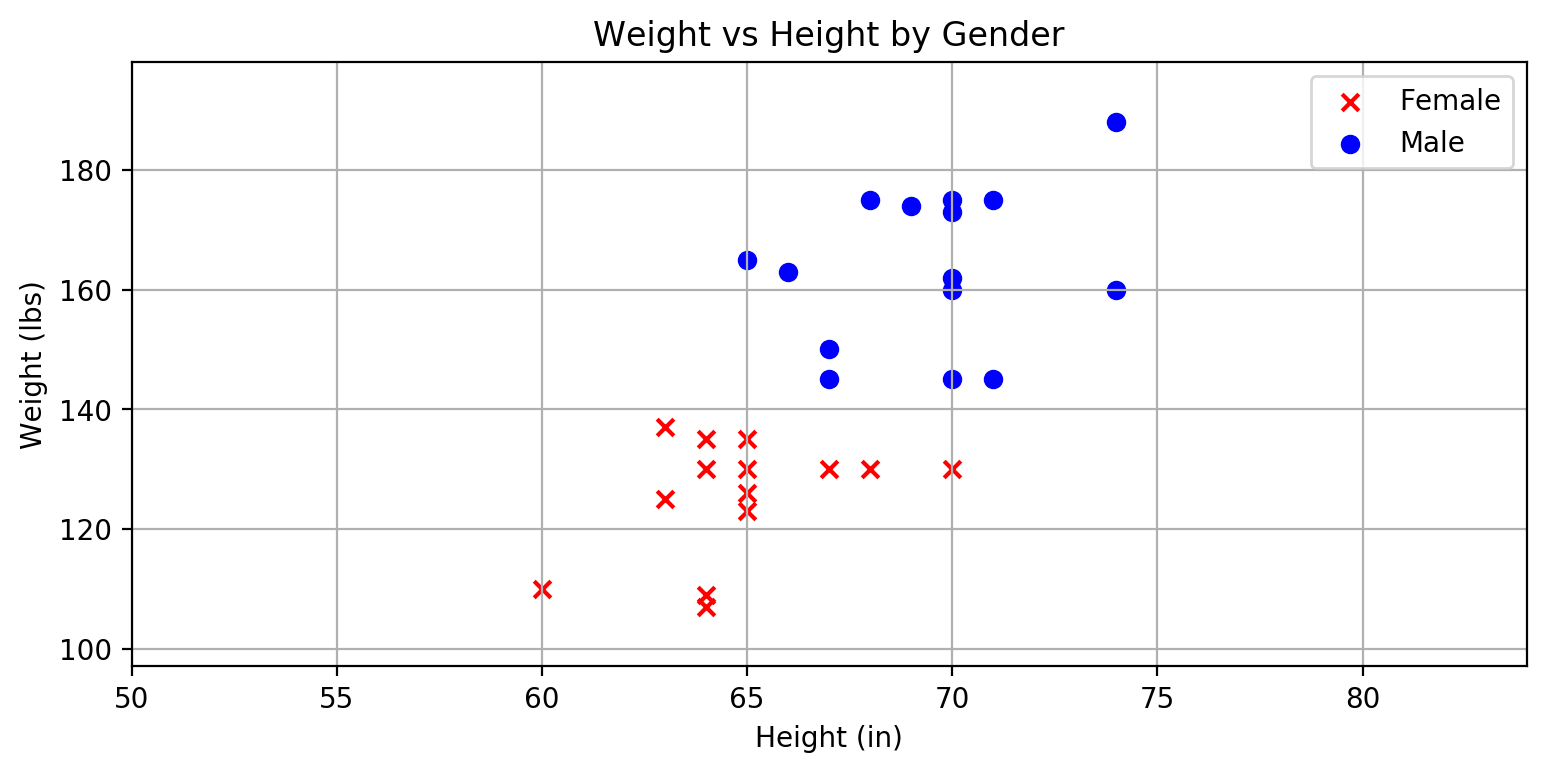

In [29]:
# Formatting the plot grid, scales, and figure size
plt.figure (figsize = (9, 4), dpi = 200) # Increased resolution from 75 to 200 dpi
plt.axis ([min_x, max_x, min_y, max_y])
plt.grid ()

for i in range (len (data_array)):
    value = data_array [i]
    
    # Assign labels values to specific matrix elements
    gender = value [2]
    height = value [0]
    weight = value [1]
    
    # Filter data points by gender
    a = plt.scatter (height [gender == 0], weight [gender == 0], marker = 'x', c = 'r', label = 'Female') # color red
    b = plt.scatter (height [gender == 1], weight [gender == 1], marker = 'o', c = 'b', label = 'Male')
    
    # Plot values, title, legend, x and y axis
    plt.title ('Weight vs Height by Gender')
    plt.xlabel ('Height (in)')
    plt.ylabel ('Weight (lbs)')
    plt.legend (handles = [a, b])

plt.show () # Works without plt.show(). Why?